In [8]:
!cat FallingBallData.txt

Use these data to calculate the velocity and acceleration (in a Python program
.py file), together with their uncertainties propagated from the displacement
vs time uncertainties. Be sure to calculate time arrays corresponding the mid-
point in time between the two displacements or velocities for the velocity and
acceleration arrays, respectively.

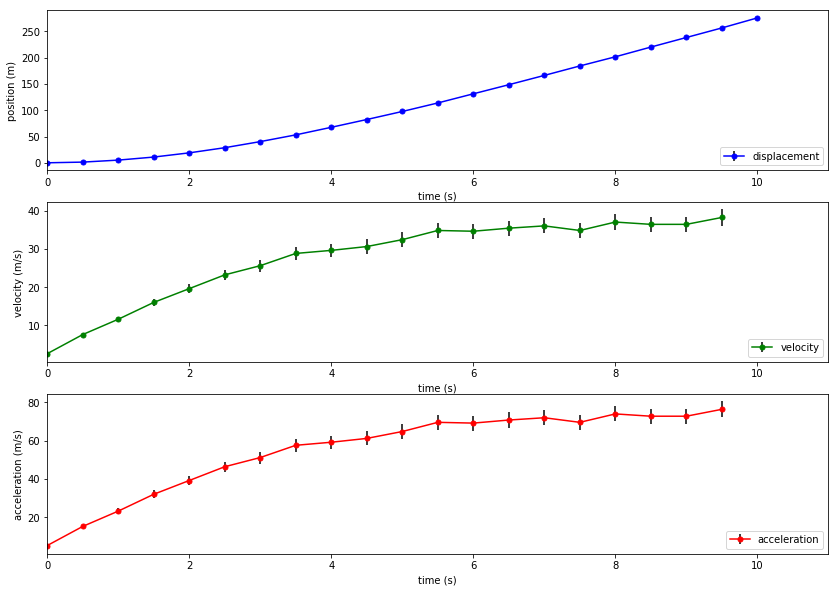

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import uncertainties as u
from uncertainties import unumpy

# read data from file
time, pos, pos_err = np.loadtxt('FallingBallData.txt', skiprows=4, unpack=True)

#utilizando o package uncertainties para juntar o dado de pos com sua incerteza
pos_u = unumpy.uarray(pos, pos_err)

#contas básicas de cinemática
delta_pos = pos_u[1:] - pos_u[:-1]
delta_time = time[1:] - time[:-1]
v_med = delta_pos / delta_time
acc_med = delta_pos / (delta_time)**2

#isolando os valores de erros para velocidade e aceleração
v_med_err = unumpy.std_devs(v_med)
acc_med_err = unumpy.std_devs(acc_med)

# create plot
plt.figure(1, figsize=(14, 10))

plt.subplot(3, 1, 1)  #(rows, columns, position)
plt.errorbar(time,
             pos,
             fmt='bo-',
             label="displacement",
             yerr=pos_err,
             markersize=5,
             ecolor='black')
plt.ylabel('position (m)')
plt.xlabel('time (s)')
plt.legend(loc='lower right')
plt.xlim(0, 11)

plt.subplot(3, 1, 2)  #(rows, columns, position)
plt.errorbar(time[0:-1],
             unumpy.nominal_values(v_med),
             fmt='go-',
             label="velocity",
             yerr=v_med_err,
             markersize=5,
             ecolor='black')
plt.ylabel('velocity (m/s)')
plt.xlabel('time (s)')
plt.legend(loc='lower right')
plt.xlim(0, 11)

plt.subplot(3, 1, 3)  #(rows, columns, position)
plt.errorbar(time[0:-1],
             unumpy.nominal_values(acc_med),
             fmt='ro-',
             label="acceleration",
             yerr=acc_med_err,
             markersize=5,
             ecolor='black')
plt.ylabel('acceleration (m/s)')
plt.xlabel('time (s)')
plt.legend(loc='lower right')
plt.xlim(0, 11)

# display plot on screen
plt.show()

In [52]:
v_med_err

array([ 0.25298221,  0.46647615,  0.72111026,  1.        ,  1.13137085,
        1.28062485,  1.56204994,  1.69705627,  1.69705627,  1.84390889,
        1.97989899,  1.97989899,  1.97989899,  1.97989899,  1.97989899,
        1.97989899,  1.97989899,  1.97989899,  1.97989899,  2.12602916])

In [53]:
acc_med_err

array([ 0.50596443,  0.9329523 ,  1.44222051,  2.        ,  2.2627417 ,
        2.56124969,  3.12409987,  3.39411255,  3.39411255,  3.68781778,
        3.95979797,  3.95979797,  3.95979797,  3.95979797,  3.95979797,
        3.95979797,  3.95979797,  3.95979797,  3.95979797,  4.25205833])